# Исследование закономерностей, влияющих на успешность игры

Заказчик - интернет-магазин по продаже игр. Планирует рекламные кампании на будущий год. 

Цель исследования - выявить определяющие успешность игры закономерности. Это позволит магазину сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

Для исследования в нашем распоряжении имеются исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года.

## Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/Users/vintera/Git/projects/my_projects/dataset/project_04/games.csv')

In [3]:
data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2459,Petz Dogz Fashion,DS,2008.0,Simulation,0.46,0.30,0.00,0.09,NaN,tbd,E
10864,PhotoKano,PSP,2012.0,Adventure,0.00,0.00,0.09,0.00,NaN,NaN,NaN
10100,Murakumo: Renegade Mech Pursuit,XB,2002.0,Shooter,0.04,0.01,0.06,0.00,48.0,7.5,T
15124,Steins;Gate: Senkei Kousoku no Phonogram,X360,2013.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
5368,The Fairly Odd Parents: Shadow Showdown,GBA,2004.0,Platform,0.25,0.09,0.00,0.01,NaN,NaN,NaN
1318,4 Nin uchi Mahjong,NES,1984.0,Misc,0.00,0.00,1.45,0.00,NaN,NaN,NaN
13080,Legend of Kay,WiiU,2015.0,Action,0.03,0.02,0.00,0.00,NaN,NaN,NaN
9064,Terminator 3: Rise of the Machines,XB,2003.0,Action,0.11,0.03,0.00,0.01,35.0,2,T
558,Madden NFL 12,X360,2011.0,Sports,2.42,0.11,0.00,0.16,78.0,5.9,E
12308,Cosmos Chaos!,DS,2010.0,Misc,0.06,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
data['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [7]:
data['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [8]:
data['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

### Вывод

В данном разделе мы ознакомились с предоставленными для исследования данными. Посмотрели уникальные значения столбцов и их количество. Как было установлено, таблица состоит из 16715 строк и 11 столбцов. В столбцах с оценками пользователей, критиков и возрастном рейтинге имеется значительная часть пропусков.

## Предобработка и исследование данных

In [9]:
# Для удобства работы, приведем названия столбцов к нижнему регистру.
data.columns = data.columns.str.lower()

In [10]:
# Удалим незначительную часть данных, в которых имеются пропуски в информации о названии игры и годе ее релиза.
data.dropna(subset = ['name', 'year_of_release'], inplace=True)

In [11]:
# Информацию о неопределенной оценке пользователей заменим на пропуски.
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [12]:
# Заменим тип данных в столбце с информацией о годе релиза.
data['year_of_release'] = data['year_of_release'].astype('int')

In [13]:
# Посчитаем общие продажи и сохраним результаты в отдельном столбце.
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Вывод

После обработки данных мы получаем таблицу, состоящую из 16444 строк и 12 столбцов. Имеющиеся пропуски было решено оставить, так  как информацию об оценках сложно предугадать, основываясь на имеющихся данных, а замена такого большого количества пропусков медианными или средними значениями значительно исказит имеющуюся информацию и негативно отразится на результатах исследования.

## Исследовательский анализ данных (EDA)

### Объемы производства игр

In [15]:
# Посчитаем количество выпущенных игр за каждый год.
games_per_year = data.groupby('year_of_release')['name'].count()
games_per_year

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

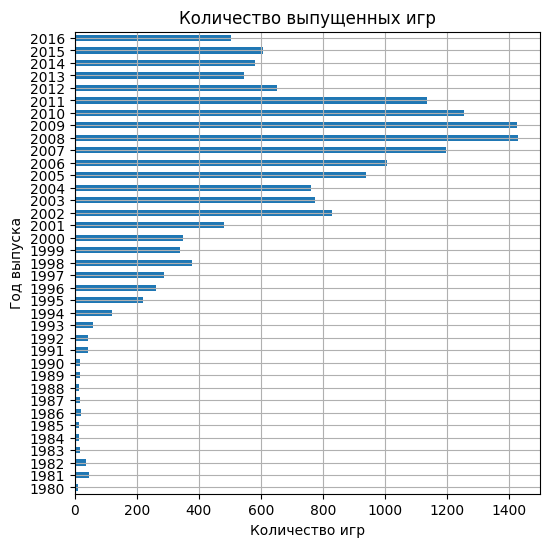

In [16]:
games_per_year.plot.barh(figsize = (6, 6), grid=True, title='Количество выпущенных игр')
plt.xlabel('Количество игр')
plt.ylabel('Год выпуска');

#### Вывод
Для наглядности отобразим полученные данные на столбчатой диаграмме. По графику сожно сдлеать следующие выводы:

1. В 2002 году, по всей видимости, происходит революция в игростроении, так как объем выпускаемых игр увеличивается почти вдвое и имеет стабильный рост до 2008 года. 

2. Года с 2006-го по 2011-й являются рекордсменами - выпускается более 1000 игр за год. 

3. С 2009 года, количество выпускаемых игр идет на спад и к 2016 году возвращается к уровню 2001 года - приблизительно 500 игр за год.

Проанализировав график, можно сказать, что для результатов исследования будут необходимы данные за все годы, так как даже в те времена, когда выпускалось ничтожное количество игр в год, могли выходить настоящие хиты, имевшие отличные объемы продаж.

### Объемы продаж игр на популярных платформах

In [17]:
# Вычислим 5 самых популярных платформ, суммировав объемы продаж игр для них.
top_5_platform = data.pivot_table(
    index= 'platform', values= 'total_sales', aggfunc= 'sum').sort_values(
    by='total_sales', ascending=False).head(5)
top_5_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


Характеристики продаж игр для топ-5 платформ
--------------------------------------------
platform          DS         PS2         PS3         Wii        X360
count      11.000000   12.000000   11.000000   11.000000   12.000000
mean       72.980000  102.796667   84.667273   81.016364   80.103333
std        61.673155   79.405729   54.637565   79.136330   57.484408
min         0.020000    0.450000    3.600000    0.180000    1.520000
25%        14.140000   35.977500   34.360000    6.170000   29.045000
50%        85.020000   89.705000  107.360000   59.650000   91.995000
75%       124.975000  170.900000  124.725000  144.960000  124.032500
max       146.940000  211.810000  156.780000  206.970000  170.030000


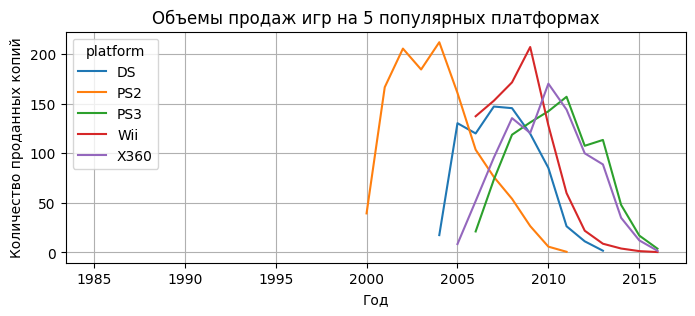

In [18]:
print('Характеристики продаж игр для топ-5 платформ')
print('--------------------------------------------')
sales_on_top5 = data.query('platform in @top_5_platform.index.values').pivot_table(
    index= 'year_of_release', columns= 'platform', values= 'total_sales', aggfunc= 'sum')

print(sales_on_top5.describe())

sales_on_top5.plot(
    figsize=(8, 3), grid=True, title='Объемы продаж игр на 5 популярных платформах')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий'); 

#### Комментарий
Как можно увидеть из полученного графика даже на платформах с наибольшими суммарными продажами их объемы начинают падать в среднем через пять лет. Можно предположить, что средний срок существования платформы и выпуска игр для нее - 5 лет.

In [19]:
report_1 = data.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).reset_index()
median_total_sales = report_1['total_sales'].median()
report_1 = report_1.query('total_sales > @median_total_sales')
report_1 = report_1.groupby(['platform']).agg({'year_of_release': 'nunique'})
lifetime = int(report_1.median())
print()
print('Медианное значение срока жизни платформы (при минимальном уровне продаж: {} млн.) составляет - {} лет.'.format(
    median_total_sales, lifetime))


Медианное значение срока жизни платформы (при минимальном уровне продаж: 16.055 млн.) составляет - 5 лет.


#### Комментарий
Для того, чтобы подтвердить гипотезу о среднем сроке существования платформы - 5 лет, сперва сгруппируем данные по годам и платформам и суммируем общее количество продаж игр на каждую платформу. Вычислим медианное значение объемов продаж игр на каждую платформу, установим его нижним порогом при фильтрации и избавимся от меньших значений(можно предположить, что успешным по продажам был год, когда продавалось игр больше медианного значения). У полученной таблицы посчитаем количество оставшихся лет на каждую платформу и вычислим для него медианное значение.

In [20]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math

platforms = data.query('platform in @top_5_platform.index.values')['platform'].unique()

size = math.ceil(math.sqrt(len(platforms)))

all_sales = data.query('platform in @top_5_platform.index.values').groupby(['platform','year_of_release']).agg({'total_sales' : 'sum'}).reset_index()

fig = make_subplots(
    rows=size, cols=size,
    subplot_titles=(platforms))

row = 0
col = 0

for i,p in enumerate(platforms):        
    
    if i % size == 0:
        col = 1
        row += 1
    else:
        col += 1
    data_ = all_sales[all_sales['platform'] == p]
    fig.add_trace(go.Scatter(x = data_['year_of_release'], y = data_['total_sales']),
              row=row, col=col)
    

fig.update_layout(height=700, width=700,
                  title_text="Распределение продаж по годам")

fig.show()

### Исследовательский анализ данных за актуальный период времени

In [21]:
# Установим актуальный период для исследования с 2013 по 2016 годы. 
# Сделаем срез и сохраним фрейм в новой переменной actual_data.
actual_data = data.query('year_of_release >= 2013')

In [22]:
# Ознакомимся с полученным actual_data.
actual_data.info()
actual_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           1256 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,991.000000,1192.000000,2233.000000
mean,2014.477385,0.196019,0.175652,0.063045,0.053726,72.023209,6.584564,0.488442
std,1.089439,0.547730,0.512451,0.233997,0.165693,12.841318,1.610413,1.235226
min,2013.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.030000
50%,2014.000000,0.020000,0.030000,0.010000,0.010000,74.000000,7.000000,0.110000
75%,2015.000000,0.150000,0.130000,0.050000,0.040000,81.000000,7.800000,0.400000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.300000,21.050000


#### Исследование актуальных игровых платформ

In [23]:
actual_platform = actual_data.pivot_table(
    index= 'platform', values= 'total_sales', aggfunc=['count', 'sum', 'mean'])
actual_platform.columns = ['count', 'sum', 'mean']
actual_platform = actual_platform.sort_values(
    by='count', ascending=False)
actual_platform

,count,sum,mean
platform,,,
PS4,392,314.14,0.801378
PSV,358,32.99,0.092151
PS3,345,181.43,0.525884
3DS,303,143.25,0.472772
XOne,247,159.32,0.645020
PC,189,39.43,0.208624
X360,186,136.80,0.735484
WiiU,115,64.63,0.562000
PSP,67,3.50,0.052239


##### Комментарий
Получим информацию о платформах, игры на которые выпускались в актуальном периоде времени. Также нам будет доступна информация о количестве игр, объемах проданных копий и среднем количестве копий, приходящемся на одну выпущенную игру для данных платформ.

Характеристики продаж игр для актуальных платформ
-------------------------------------------------
platform        3DS    DS         PC         PS3         PS4       PSP  \
count      4.000000  1.00   4.000000    4.000000    4.000000  3.000000   
mean      35.812500  1.54   9.857500   45.357500   78.535000  1.166667   
std       18.128338   NaN   3.701102   48.898675   40.567917  1.710010   
min       15.140000  1.54   5.250000    3.600000   25.990000  0.120000   
25%       24.620000  1.54   7.702500   13.515000   58.435000  0.180000   
50%       35.770000  1.54  10.450000   32.290000   84.625000  0.240000   
75%       46.962500  1.54  12.605000   64.132500  104.725000  1.690000   
max       56.570000  1.54  13.280000  113.250000  118.900000  3.140000   

platform        PSV       Wii       WiiU       X360       XOne  
count      4.000000  4.000000   4.000000   4.000000   4.000000  
mean       8.247500  3.415000  16.157500  34.200000  39.830000  
std        3.596205  3.765355   8.1295

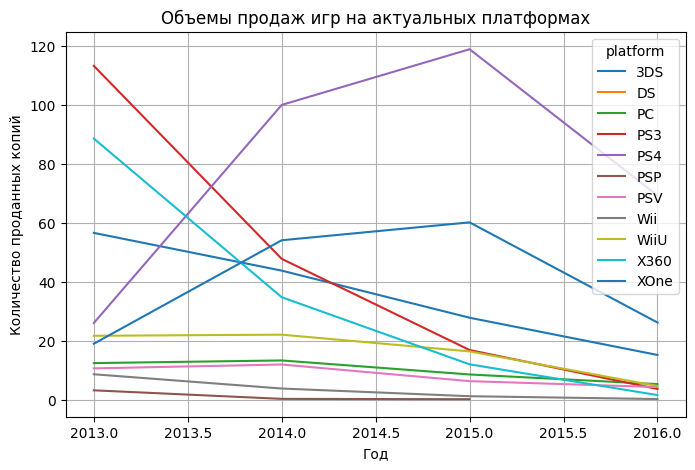

In [24]:
print('Характеристики продаж игр для актуальных платформ')
print('-------------------------------------------------')
sales_on_actual_platform = actual_data.pivot_table(
    index= 'year_of_release', columns= 'platform', values= 'total_sales', aggfunc= 'sum')

print(sales_on_actual_platform.describe())

sales_on_actual_platform.plot(
    figsize=(8, 5), grid=True, title='Объемы продаж игр на актуальных платформах')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий'); 

##### Комментарий
Среди платформ в рассматриваемом периоде можно выделить пять лидеров по продажам - PS4, PS3, XOne, 3DS, X360. Однако, при этом, на графике можно заметить, что продажи игр на всех рассматриваемых платформах имеют тенденцию к снижению. Возможно только продажи игр на PS4 окажутся рентабельными, но придерживаясь общей тенденции, также будут стремительно снижаться. Относительно стабильными могут показаться продажи игр на PC и PCV, однако их показатели очень низки и сохраняются на уровне 10-8 млн. проданных копий в рассматриваемом периоде.

Характеристи продаж игр с разбивкой на платформы
-------------------------------------------------
platform         3DS        DS          PC         PS3         PS4        PSP  \
count     303.000000  8.000000  189.000000  345.000000  392.000000  67.000000   
mean        0.472772  0.192500    0.208624    0.525884    0.801378   0.052239   
std         1.381347  0.172026    0.352304    1.451939    1.609456   0.059768   
min         0.010000  0.030000    0.010000    0.010000    0.010000   0.010000   
25%         0.040000  0.067500    0.030000    0.040000    0.060000   0.015000   
50%         0.090000  0.150000    0.080000    0.150000    0.200000   0.020000   
75%         0.280000  0.252500    0.230000    0.510000    0.730000   0.070000   
max        14.600000  0.510000    3.050000   21.050000   14.630000   0.240000   

platform         PSV        Wii        WiiU        X360        XOne  
count     358.000000  23.000000  115.000000  186.000000  247.000000  
mean        0.092151   0.593913

<AxesSubplot: title={'center': 'total_sales'}, xlabel='platform'>

Text(0.5, 1.0, 'Глобальные продажи игр на актуальных платформах')

Text(0.5, 0, 'Платформа')

Text(0, 0.5, 'Количество проданных копий')

(0.0, 6.0)

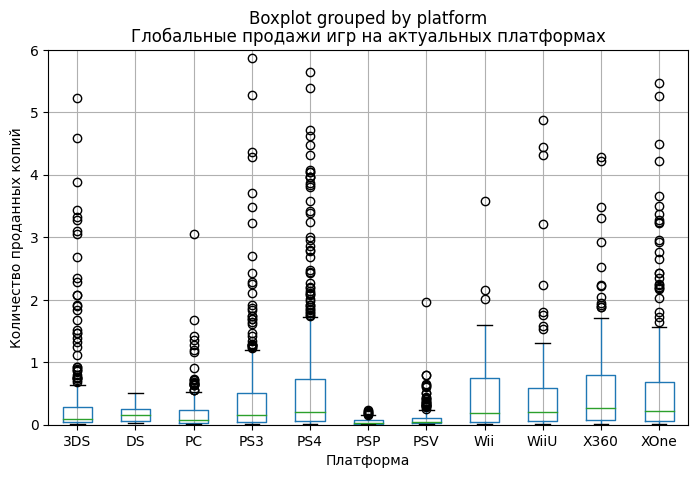

In [25]:
print('Характеристи продаж игр с разбивкой на платформы')
print('-------------------------------------------------')
print(actual_data.pivot_table(index='name', columns='platform', values='total_sales').describe())

actual_data.boxplot('total_sales', by='platform', figsize=(8, 5))
plt.title('Глобальные продажи игр на актуальных платформах')
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий')
plt.ylim(0,6)

##### Вывод
Из полученного графика можно сделать следующие выводы:
1. 75% игр на представленные платформы не достигают отметки в 0.8 млн проданных копий.
2. Самые высокие медианные значения объемов продаж имют платформы X360, XOne, PS4 и WiiU, что может говорить о стабильности продаж игр для этих платформ.
3. Суммарные объемы продаж в основном зависят от количества выпущенных игр на платформу.

In [26]:
# В подтверждение взаимосвязи между количеством выпущенных игр и объемами их продаж вычисляем уровень корреляции - 0.74.
actual_platform['count'].corr(actual_platform['sum'])

0.7443167975591408

#### Исследование влияния отзывов пользователей и критиков на продажи

<AxesSubplot: title={'center': 'Соотношение объемов продаж и пользовательского рейтинга игр для PS4'}, xlabel='user_score', ylabel='total_sales'>

Text(0.5, 0, 'Пользовательский рейтинг')

Text(0, 0.5, 'Объемы продаж')

Корреляция рассматриваемых параметров: -0.03


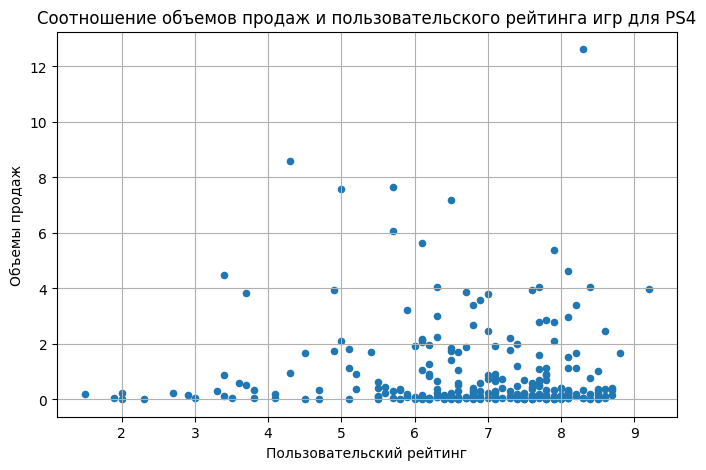

In [27]:
actual_data.query('platform == "PS4"').plot(
    x='user_score', y='total_sales', kind='scatter', grid=True, figsize=(8,5), 
    title='Соотношение объемов продаж и пользовательского рейтинга игр для PS4')
plt.xlabel('Пользовательский рейтинг')
plt.ylabel('Объемы продаж')
corr_sales_to_user_score = actual_data.query(
    'platform == "PS4"')['user_score'].corr(
    actual_data.query('platform == "PS4"')['total_sales'])
print('Корреляция рассматриваемых параметров: {:.2f}'.format(corr_sales_to_user_score))

##### Комментарий
Корреляция в - 0.03 и диаграмма рассеяния сообщают нам, что объемы продаж игр на PS4 совершенно не зависят от пользовательского рейтинга.

<AxesSubplot: title={'center': 'Соотношение объемов продаж и оценок критиков игр для PS4'}, xlabel='critic_score', ylabel='total_sales'>

Text(0.5, 0, 'Оценки критиков')

Text(0, 0.5, 'Объемы продаж')

Корреляция рассматриваемых параметров: 0.41


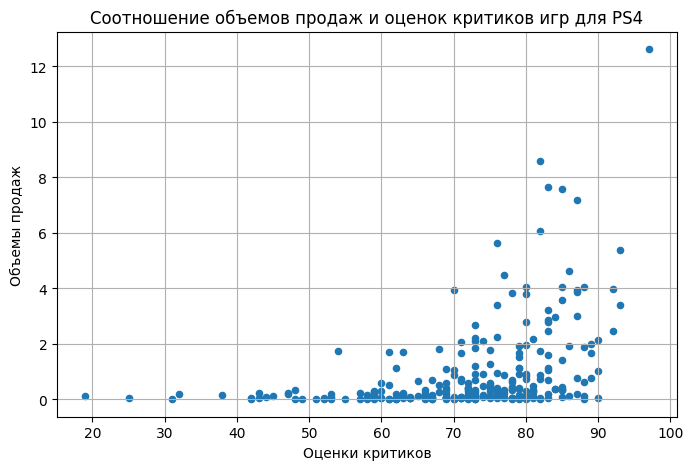

In [28]:
actual_data.query('platform == "PS4"').plot(
    x='critic_score', y='total_sales', kind='scatter', grid=True, figsize=(8,5), 
    title='Соотношение объемов продаж и оценок критиков игр для PS4')
plt.xlabel('Оценки критиков')
plt.ylabel('Объемы продаж')
corr_sales_to_critic_score = actual_data.query(
    'platform == "PS4"')['critic_score'].corr(
    actual_data.query('platform == "PS4"')['total_sales'])
print('Корреляция рассматриваемых параметров: {:.2f}'.format(corr_sales_to_critic_score))

##### Комментарий
В отличие от пользовательского рейтинга, на данной диаграмме можно заметить, что самые продаваемые игры, как правило, имеют хорошие оценки критиков. Несмотря на это, большое количество игр с хорошим рейтингом и невысокими объемами продаж, а также корреляция в 0.41 говорят нам о слабой взаимосвязи рассматриваемых параметров. 

<AxesSubplot: title={'center': 'Соотношение объемов продаж и пользовательского рейтинга игр для актуальных платформ'}, xlabel='user_score', ylabel='total_sales'>

Text(0.5, 0, 'Пользовательский рейтинг')

Text(0, 0.5, 'Объемы продаж')

Корреляция рассматриваемых параметров: -0.00


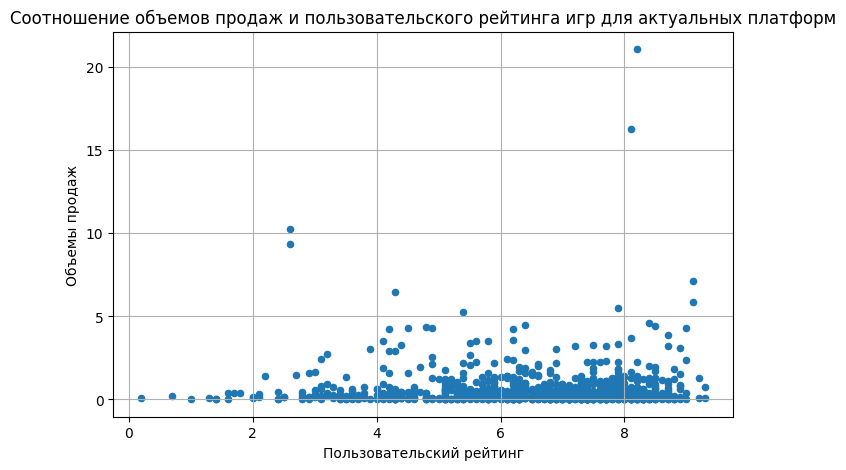

In [29]:
actual_data.query('platform != "PS4"').plot(
    x='user_score', y='total_sales', kind='scatter', grid=True, figsize=(8,5), 
    title='Соотношение объемов продаж и пользовательского рейтинга игр для актуальных платформ')
plt.xlabel('Пользовательский рейтинг')
plt.ylabel('Объемы продаж')
corr_sales_to_user_score_all = actual_data.query(
    'platform != "PS4"')['user_score'].corr(
    actual_data.query('platform != "PS4"')['total_sales'])
print('Корреляция рассматриваемых параметров: {:.2f}'.format(corr_sales_to_user_score_all))

Корреляция рассматриваемых параметров: 0.28


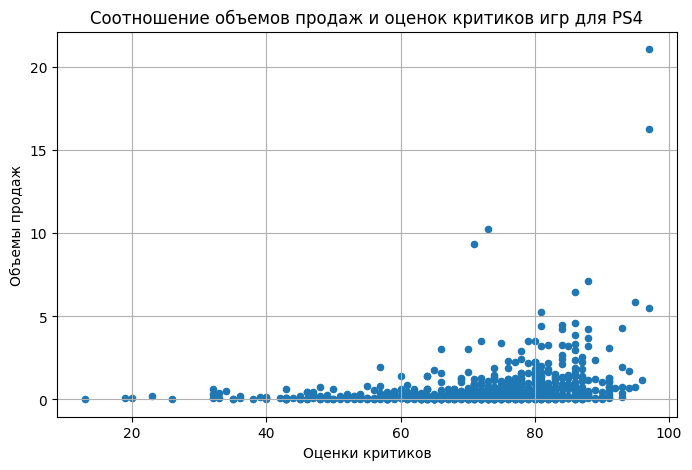

In [30]:
actual_data.query('platform != "PS4"').plot(
    x='critic_score', y='total_sales', kind='scatter', grid=True, figsize=(8,5), 
    title='Соотношение объемов продаж и оценок критиков игр для PS4')
plt.xlabel('Оценки критиков')
plt.ylabel('Объемы продаж')
corr_sales_to_critic_score_all = actual_data.query(
    'platform != "PS4"')['critic_score'].corr(
    actual_data.query('platform != "PS4"')['total_sales'])
print('Корреляция рассматриваемых параметров: {:.2f}'.format(corr_sales_to_critic_score_all));

##### Вывод
Зависимость объемов продаж и оценок критиков/пользователей для популярной PS4 и других платформ практически одинакова, о чем сообщают низкие показатели корреляции и разбросанные по всей диаграмме рассеяния показатели рассматриваемых параметров.

#### Исследование игр с распределением по жанрам

In [31]:
actual_genre = actual_data.pivot_table(index= 'genre', values= 'total_sales', aggfunc=['count', 'sum', 'mean'])
actual_genre.columns = ['Количество игр', 'Объемы продаж', 'Среднее значение']
actual_genre = actual_genre.sort_values(by='Количество игр', ascending=True)
actual_genre
corr_actual_genre = actual_genre['Количество игр'].corr(actual_genre['Объемы продаж'])
print('------------------------------------------------')
print('Корреляция количества и объемов продаж игр: {:.2f}'.format(corr_actual_genre))
actual_genre.info()

,Количество игр,Объемы продаж,Среднее значение
genre,,,
Puzzle,17,3.17,0.186471
Strategy,56,10.08,0.180000
Simulation,62,21.76,0.350968
Platform,74,42.63,0.576081
Fighting,80,35.31,0.441375
Racing,85,39.89,0.469294
Misc,155,62.82,0.405290
Shooter,187,232.98,1.245882
Sports,214,150.65,0.703972


------------------------------------------------
Корреляция количества и объемов продаж игр: 0.84
<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Puzzle to Action
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Количество игр    12 non-null     int64  
 1   Объемы продаж     12 non-null     float64
 2   Среднее значение  12 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 384.0+ bytes


<AxesSubplot: title={'center': 'Распределение по жанрам'}, ylabel='genre'>

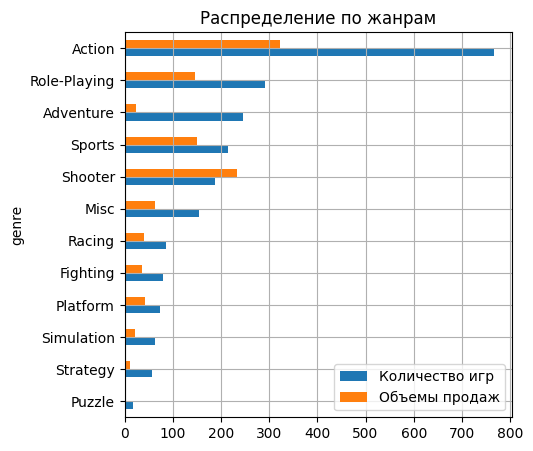

In [32]:
actual_genre[['Количество игр', 'Объемы продаж']].plot.barh(
    figsize = (5, 5), grid=True, title='Распределение по жанрам')

##### Вывод
Проанализировав данные, распределенные по жанрам, можно сказать следующее:
1. Зависимость объемов продаж от количества выпускаемых игры высока.
2. Тройка лидеров продаж среди жанров выглядит следующим образом: 1."Action", 2."Shooter", 3."Sports".
3. Несмотря на лидерство в продажах, жанр "Action" в среднем имеет 420 тыс. копий на одну выпущенную игру, чего не скажешь про жанр "Shooter", где на одну выпущенную игру в среднем приходится 1.25 млн. копий.
4. Абсолютным антилидером по продажам является жанр "Adventure" с 96 тыс. копий на одну выпущенную игру.

### Вывод

Проведя исследовательский анализ данных можно прийти к следующим выводам:
- Рынок игростроения переживает кризис, показатели стремятся к уровню 2001 года по выпуску новых игр. Возможно основные потоки производства и продаж игр перебериаются на смартфоны, те самые устройства, которые есть почти у каждого человека, в отличие от специальных игровых платформ. Можно предположить, что анализ рынка игр для смартфонов принесет свои плоды.
- Из оставшихся игровых платформ, только PS4 находится в заключительной стадии цикла "жизни платформы" и в следующем году продажи игр на нее еще принесут прибыль. В то же время мы увидели, что новая платформа имеет тенденции к резкому росту объемов продаж игр для нее, поэтому, чтобы "оставаться на плаву", возникает необходимость постоянного мониторинга рынка производителей игровых консолей.
- Объемы продаж игр практически всегда зависимы от количества выпущенных игр на ту или иную платформу.
- Как ни странно, оценки критиков и пользователей практически не влияют на объемы продаж. По всей видимости, оценки появляются позже основных объемов продаж, обеспеченных качественными рекламными кампаниями.
- Жанр Shooter является лидером по проданным копиям на одну выпущенную игру, чего не скажешь про жанр Adventure, с его самыми низкими продажами.

## Среднестатистический портрет пользователя игровых платформ

In [33]:
# Функция для создания таблицы Топ-5 платформ
def top_5_platforms(column):
    top_5_platforms = actual_data.pivot_table(
    index= 'platform', values= column, aggfunc= 'sum').sort_values(
    by=column, ascending=False).head(5)
    print(top_5_platforms)
    print(top_5_platforms.plot(kind='bar', title= column))

# Функция для создания таблицы Топ-5 жанров
def top_5_genres(column):
    top_5_genres = actual_data.pivot_table(
    index= 'genre', values= column, aggfunc= 'sum').sort_values(
    by=column, ascending=False).head(5)
    print(top_5_genres)
    print(top_5_genres.plot(kind='bar', title= column))

### Топ-5 игровых платформ по регионам

ТОП-5 игровых платформ в Северной Америке
-----------------------------------------
          na_sales
platform          
PS4         108.74
XOne         93.12
X360         81.66
PS3          63.50
3DS          38.20
AxesSubplot(0.125,0.11;0.775x0.77)

ТОП-5 игровых платформ в Европе
-----------------------------------------
          eu_sales
platform          
PS4         141.09
PS3          67.81
XOne         51.59
X360         42.52
3DS          30.96
AxesSubplot(0.125,0.11;0.775x0.77)

ТОП-5 игровых платформ в Японии
-----------------------------------------
          jp_sales
platform          
3DS          67.81
PS3          23.35
PSV          18.59
PS4          15.96
WiiU         10.88
AxesSubplot(0.125,0.11;0.775x0.77)


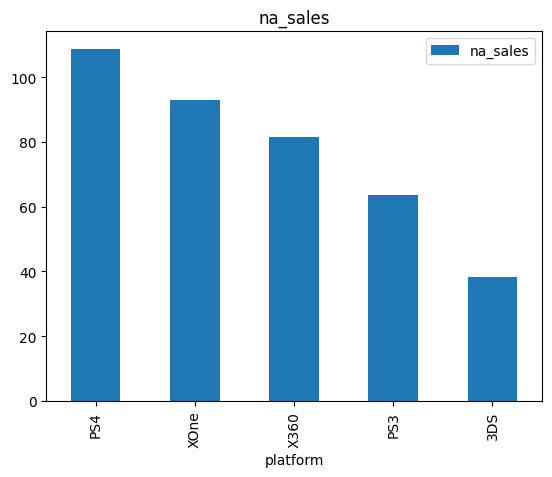

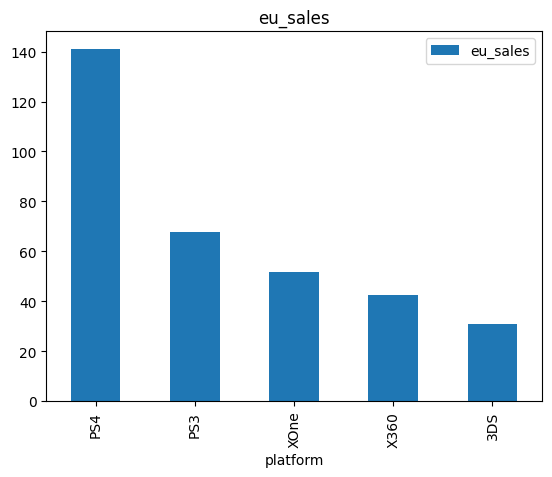

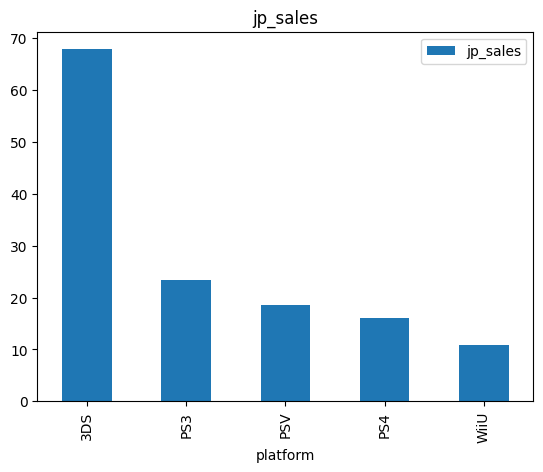

In [34]:
print('ТОП-5 игровых платформ в Северной Америке')
print('-----------------------------------------')
top_5_platforms('na_sales')
print()
print('ТОП-5 игровых платформ в Европе')
print('-----------------------------------------')
top_5_platforms('eu_sales')
print()
print('ТОП-5 игровых платформ в Японии')
print('-----------------------------------------')
top_5_platforms('jp_sales')

#### Вывод
Несмотря на то, что PS4 является игровой платформой произведенной Японией, настоящее признание она получила в Европе, где игроки с большим отрывом от других игровых платформ предпочитают покупать игры именно на нее. В самой же Японии значительная часть игр приобретается на мобильную игровую платформу 3DS, возможно с темпами жизни в этой стране, игроков там значительно меньше и удобнее им пользоваться мобильными игровыми устройствами. В Североамериканском регионе между платформами более умеренное распределение - от лидера PS4 с небольшим отрывом отстают местные XOne и X360.

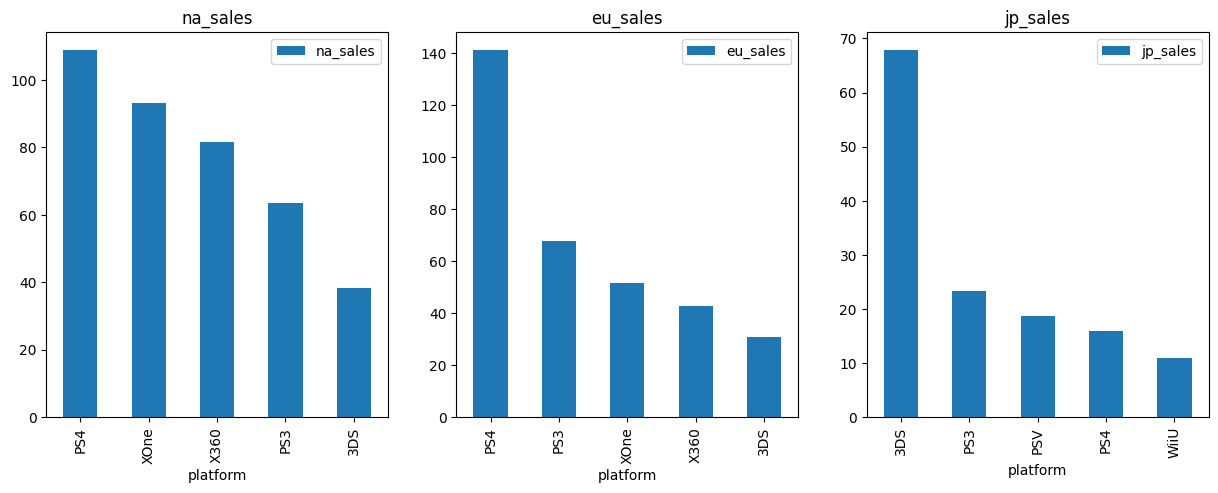

In [35]:
regs = ['na_sales','eu_sales','jp_sales']

fig, axes = plt.subplots(1,3,figsize=(15,5))

for r,ax in zip(regs,axes.flat):
    top_5_platforms = actual_data.pivot_table(
        index= 'platform', values=r, aggfunc= 'sum').sort_values(
        by=r, ascending=False).head(5)
    _ = (top_5_platforms.plot(kind='bar', title=r,ax=ax))

### Топ-5 игровых жанров по регионам

ТОП-5 игровых жанров в Северной Америке
-----------------------------------------
              na_sales
genre                 
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
AxesSubplot(0.125,0.11;0.775x0.77)

ТОП-5 игровых жанров в Европе
-----------------------------------------
              eu_sales
genre                 
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
AxesSubplot(0.125,0.11;0.775x0.77)

ТОП-5 игровых жанров в Японии
-----------------------------------------
              jp_sales
genre                 
Role-Playing     51.04
Action           40.49
Misc              9.20
Fighting          7.65
Shooter           6.61
AxesSubplot(0.125,0.11;0.775x0.77)


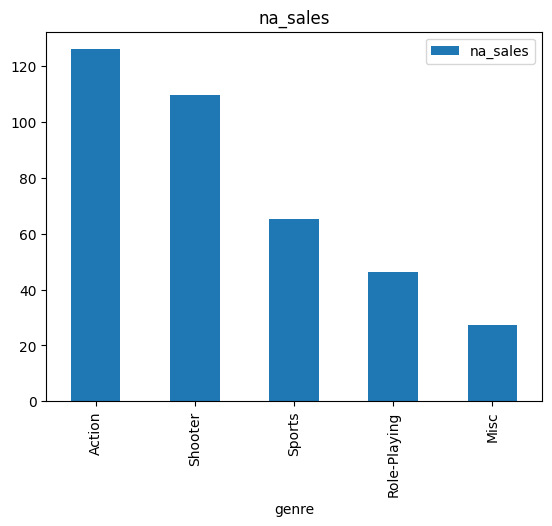

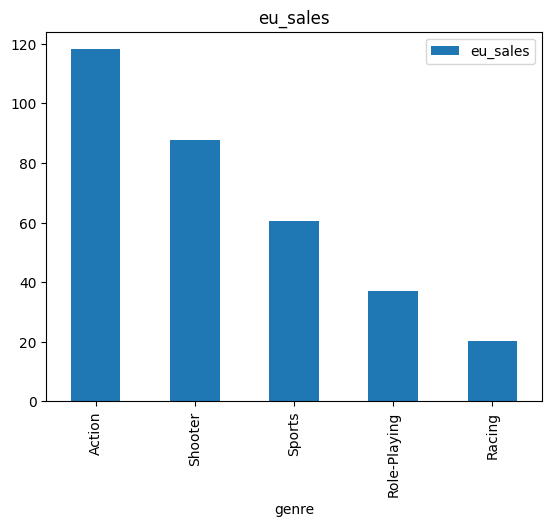

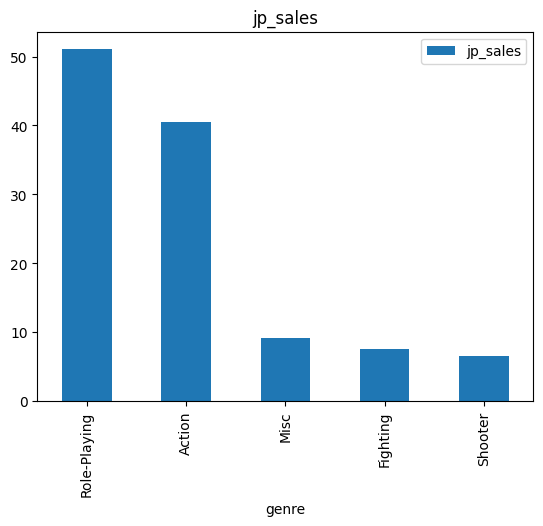

In [36]:
print('ТОП-5 игровых жанров в Северной Америке')
print('-----------------------------------------')
top_5_genres('na_sales')
print()
print('ТОП-5 игровых жанров в Европе')
print('-----------------------------------------')
top_5_genres('eu_sales')
print()
print('ТОП-5 игровых жанров в Японии')
print('-----------------------------------------')
top_5_genres('jp_sales')

#### Вывод
Если в выборе игрового жанра пользователи Северной Америки и Европы солидарны - тройку лидеров у них составляют Action, Shooter и Sports практически с равными значениями, то в Японии большим предпочтением пользуются Role-Playing игры. В целом, жанр Action занимает ключевые позиции во всех регионах и, скорее всего, является самых доходным для производителей игр.

### Влияение рейтинга ESRB на продажи по регионам

In [37]:
actual_data['rating'] = actual_data['rating'].fillna('RP')

In [38]:
ESRB = actual_data.pivot_table(
    index= 'rating', 
    values= ['na_sales', 'eu_sales', 'jp_sales'], 
    aggfunc= ['mean'])
ESRB

mean                    
        eu_sales  jp_sales  na_sales
rating                              
E       0.276026  0.050132  0.261755
E10+    0.169405  0.023373  0.215238
M       0.393821  0.038238  0.447724
RP      0.080768  0.087052  0.091525
T       0.125976  0.061832  0.149520

<AxesSubplot: title={'center': 'Объем продаж игр с разделением по рейтингам в разных регионах'}, xlabel='rating'>

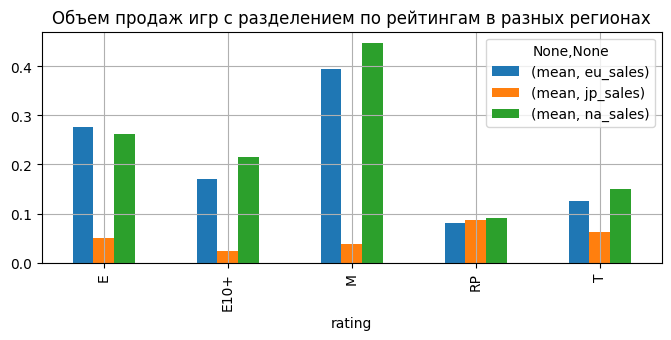

In [39]:
ESRB.plot(kind="bar", stacked=False, grid=True, figsize=(8, 3), 
          title='Объем продаж игр с разделением по рейтингам в разных регионах')

#### Вывод
Как уже было установленно ранее, в Японии играют меньше и во всех возрастных категориях практически поровну. Объемы продаж по всем возрастным категоориям в Европе и Северной Америке практически одинаковы, можно предположить, что значительная часть игроков в этих регионах более возрастная и чаще приобретает игры с рейтингом М (+17). В целом, по полученным данным ответить на вопрос, влияет ли рейтинг ESRB на продажи в отдельных регионах сложно, так как мы не знаем, о строгости контроля и соблюдении требований ESRB в разных странах этих регионов. При условии строгого соблюдения рейтинговых правил, мы лишь можем судить о возрастном распределении игроков по регионам.

### Вывод

Исследовав актуальные данные о предпочтениях игроков в отдельных регионах можно сделать выводы:
1. Среднестатистический игрок Европы и Северной Америки во многом схож:
 - в основном он старше 17 лет;
 - предпочитает играть на PS4;
 - отдает преимущество играм в жанрах Action и Shooter.
_______________________________________________________________________________________________
2. Японский среднестатистический игрок, в силу сложившегося в стране менталитета, сильно отличающегося от европейского и североамериканского, имеет следующие характеристики:
 - игрвет в игры всех возрастных групп одинаково;
 - предпочитает мобильную игровую платформу 3DS;
 - любит играть в Role-Playing игры.
 

## Проверка гипотез

### Гипотеза 1: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

H₀ - Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

H₁ - Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [40]:
xone_user_score = actual_data.query('platform == "XOne" and user_score > 0')['user_score']
pc_user_score = actual_data.query('platform == "PC" and user_score > 0')['user_score']

In [41]:
alpha = 0.05 # стандартный критический уровень статистической значимости
results = st.ttest_ind(xone_user_score, pc_user_score, equal_var=True)

print('Средний пользовательский рейтинг Xbox One: {:.1f}'.format(xone_user_score.mean()))
print('Средний пользовательский рейтинг PC: {:.1f}'.format(pc_user_score.mean()))
print()
print('p-значение: {}'.format(results.pvalue))
print()
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг Xbox One: 6.5
Средний пользовательский рейтинг PC: 6.3

p-значение: 0.14012658403611647

Не получилось отвергнуть нулевую гипотезу


p-значение больше критического уровня статистической значимости, что говорит нам о равенстве двух совокупностей, в связи с чем нулевую гипотезу опровергнуть не получается. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Гипотеза 2: "Средние пользовательские рейтинги жанров Action и Sports разные".

H₀ - Средние пользовательские рейтинги жанров Action и Sports одинаковые.

H₁ - Средние пользовательские рейтинги жанров Action и Sports разные.

In [42]:
action_user_score = actual_data.query('genre == "Action" and user_score > 0')['user_score']
sports_user_score = actual_data.query('genre == "Sports" and user_score > 0')['user_score']

In [43]:
alpha = 0.05 # стандартный критический уровень статистической значимости
results = st.ttest_ind(action_user_score, sports_user_score, equal_var=True)

print('Средний пользовательский рейтинг жанра Action: {:.1f}'.format(action_user_score.mean()))
print('Средний пользовательский рейтинг жанра Sports: {:.1f}'.format(sports_user_score.mean()))
print()
print('p-значение: {}'.format(results.pvalue))
print()
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг жанра Action: 6.8
Средний пользовательский рейтинг жанра Sports: 5.2

p-значение: 1.0517832389140023e-27

Отвергаем нулевую гипотезу


p-значение значительно меньше критического уровня статистической значимости, что говорит нам о неравенстве двух совокупностей, в связи с чем, отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports разные.

### Вывод

Проверив выдвинутые гипотезы, делаем следующие выводы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковы;
- Средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод и рекомендации бизнесу

Подводя итог исследования можно сказать, что закономерности, влияющие на успешность игры, отличаются в зависимости от региона продаж. Учитывая, что рынки Северной Америки и Европы схожи по многим показателям, можно выделить две основные группы:

   1. Европа и Северная Америка:
        - Жанр Action самый продаваемый, Shooter самый окупаемый;
        - Игры с возрастным рейтингом М самые продаваемые;
        - Предпочитаемая игровая платформа - PS4.
   2. Япония:
        - Продажи игр в этом регионе крайне низки в сравнении с Европой и Северной Америкой;
        - Игры в жанре Role-Playing самые востребованные;
        - Возрастной рейтинг в основном не влияет на продажи в этой стране;
        - Подавляющая часть игр продается на мобильную игровую платформу 3DS.

______________________________________________________________________________________________
Касательно общих наблюдений и тенденций, можно выделить следующие:

   1. Показатели производства новых игр для игровых платформ идут на спад и достигают уровня 2001 года;
   2. Зависимость объемов продаж от оценок критиков и пользователей практически отсутствует;
   3. Показатели продаж для всех актуальных платформ падают, в настоящий момент нет ни одной игровой платформы, продажи игр для котрой, показывали бы рост.
   
______________________________________________________________________________________________
Исходя из вышеизложенного можно дать следующие рекомендации бизнесу:

   1. Необходимо осуществлять мониторинг рынка производства новых игровых платформ. Учитывая, что в настоящий момент все актуальные платформы находятся на закате своего жизненного цикла, можно предположить, что в ближайшее время состоится выход новой и перспективной игровой платформы.
   2. Игровая индустрия не заключается лишь в продажах игр на игровые платформы. С учетом активного развития технических характеристик смартфонов, их доступностью и практичностью, следует обратить внимание на рынок производства игр для Android и iOS.